# Hopfield Network

In [1]:
import numpy as np

def train_hopfield(patterns, size):
    weights = np.zeros((size, size))
    for pattern in patterns:
        pattern = np.reshape(pattern, (size, 1))
        weights += np.dot(pattern, pattern.T)
    np.fill_diagonal(weights, 0)
    return weights

def recall_pattern(weights, pattern, steps=10):
    pattern = np.reshape(pattern, (weights.shape[0], 1))
    for _ in range(steps):
        pattern = np.sign(np.dot(weights, pattern))
    return pattern.flatten()

patterns = np.array([[-1, 1, -1, 1], [1, -1, 1, -1]])
size = 4
weights = train_hopfield(patterns, size)

test_pattern = np.array([-1, 1, -1, -1])
recalled_pattern = recall_pattern(weights, test_pattern)
print("Original Pattern: ", test_pattern)
print("Recalled Pattern:", recalled_pattern)

Original Pattern:  [-1  1 -1 -1]
Recalled Pattern: [-1.  1. -1.  1.]


# Universal Approximation Theorem

Epoch 0, Loss: 7.352297782897949
Epoch 100, Loss: 0.4206390380859375
Epoch 200, Loss: 0.39347773790359497
Epoch 300, Loss: 0.3713873028755188
Epoch 400, Loss: 0.3608628213405609
Epoch 500, Loss: 0.23298101127147675
Epoch 600, Loss: 0.1624346673488617
Epoch 700, Loss: 0.11761437356472015
Epoch 800, Loss: 0.09346437454223633
Epoch 900, Loss: 0.08499567955732346


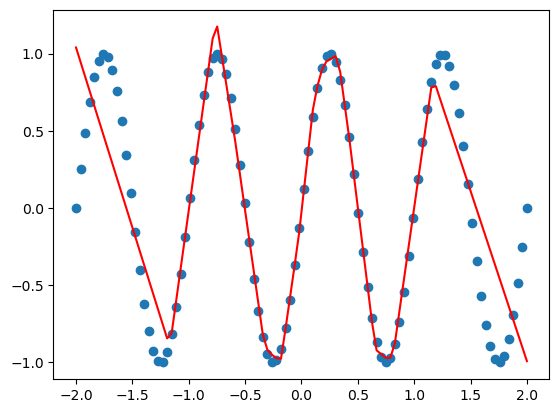

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

def forward(x, params):
    x = torch.relu(torch.matmul(x, params['w1']) + params['b1'])
    x = torch.relu(torch.matmul(x, params['w2']) + params['b2'])
    x = torch.matmul(x, params['w3']) + params['b3']
    return x

x = np.linspace(-2, 2, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * x)

x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

params = {
    'w1': torch.randn(1, 10, requires_grad=True),
    'b1': torch.zeros(10, requires_grad=True),
    'w2': torch.randn(10, 10, requires_grad=True),
    'b2': torch.zeros(10, requires_grad=True),
    'w3': torch.randn(10, 1, requires_grad=True),
    'b3': torch.zeros(1, requires_grad=True)
}

optimizer = optim.Adam(params.values(), lr=0.01)
criterion = nn.MSELoss()

for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = forward(x_train, params)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

y_pred = forward(x_train, params).detach().numpy()
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")
plt.show()
